In [1]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mg = gpd.read_file('31UFE250GC_SIR.shp')
mg_meso = gpd.read_file('31MEE250GC_SIR.shp')

# Seleção por Tipologia

## Dados em Latitude e Longitude

In [3]:
dados = pd.read_excel('dados2018.xlsx')
dados_lat = dados[dados['LATITUDE'].isna() == False]
dados_lat = dados_lat[dados_lat['TIPOLOGIA'] == 'Mineração']
dados_lat.head()

,CNPJ DO EMPREENDEDOR,EMPREENDEDOR,CNPJ DO EMPREENDIMENTO,EMPREENDIMENTO,NOME,CLASSE,MUNICÍPIO,BACIA,TIPOLOGIA,SITUAÇÃO DE ESTABILIDADE,...,COORDENADA UTMX,COORDENADA UTMY,LATITUDE GRAU,LATITUDE MINUTOS,LATITUDE SEGUNDOS,LONGITUDE GRAU,LONGITUDE MINUTOS,LONGITUDE SEGUNDOS,LATITUDE,LONGITUDE
8,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,BARRAGEM 1,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,NaN,19.0,39.0,35.0,46.0,55.0,37.0,-19.659722,-46.926944
14,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,BARRAGEM MINA II,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,NaN,19.0,39.0,25.0,46.0,56.0,24.0,-19.656944,-46.940000
16,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM A,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,NaN,19.0,38.0,59.0,46.0,56.0,46.0,-19.649722,-46.946111
17,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM A0,III,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,NaN,19.0,37.0,0.0,47.0,2.0,0.0,-19.616667,-47.033333
18,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM B1-B4,III,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,NaN,19.0,38.0,1.0,46.0,59.0,47.0,-19.633611,-46.996389


In [4]:
geometry = [Point(x) for x in zip(dados_lat.LONGITUDE, dados_lat.LATITUDE)]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados_lat = gpd.GeoDataFrame(dados_lat, crs = crs, geometry = geometry)
geo_dados_lat.head()

,CNPJ DO EMPREENDEDOR,EMPREENDEDOR,CNPJ DO EMPREENDIMENTO,EMPREENDIMENTO,NOME,CLASSE,MUNICÍPIO,BACIA,TIPOLOGIA,SITUAÇÃO DE ESTABILIDADE,...,COORDENADA UTMY,LATITUDE GRAU,LATITUDE MINUTOS,LATITUDE SEGUNDOS,LONGITUDE GRAU,LONGITUDE MINUTOS,LONGITUDE SEGUNDOS,LATITUDE,LONGITUDE,geometry
8,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,BARRAGEM 1,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,39.0,35.0,46.0,55.0,37.0,-19.659722,-46.926944,POINT (-46.92694444 -19.65972222)
14,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,33.131.541/0001-08,COMPANHIA BRASILEIRA DE METALURGIA E MINERAÇÃO...,BARRAGEM MINA II,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,39.0,25.0,46.0,56.0,24.0,-19.656944,-46.940000,POINT (-46.94 -19.65694444)
16,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM A,II,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,38.0,59.0,46.0,56.0,46.0,-19.649722,-46.946111,POINT (-46.94611111 -19.64972222)
17,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM A0,III,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,37.0,0.0,47.0,2.0,0.0,-19.616667,-47.033333,POINT (-47.03333333 -19.61666667)
18,33.931.486/0001-30,MOSAIC FERTILIZANTES P&K LTDA.,33.931.486/0019-60,MOSAIC FERTILIZANTES P&K LTDA.,BARRAGEM B1-B4,III,Araxá,Rio Paranaíba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,38.0,1.0,46.0,59.0,47.0,-19.633611,-46.996389,POINT (-46.99638889 -19.63361111)


## Dados em UTM

In [5]:
dados_utm = dados[dados['COORDENADA UTMY'].isna() == False]
dados_utm = dados_utm[dados_utm['TIPOLOGIA'] == 'Mineração']
dados_utm.head()

,CNPJ DO EMPREENDEDOR,EMPREENDEDOR,CNPJ DO EMPREENDIMENTO,EMPREENDIMENTO,NOME,CLASSE,MUNICÍPIO,BACIA,TIPOLOGIA,SITUAÇÃO DE ESTABILIDADE,...,COORDENADA UTMX,COORDENADA UTMY,LATITUDE GRAU,LATITUDE MINUTOS,LATITUDE SEGUNDOS,LONGITUDE GRAU,LONGITUDE MINUTOS,LONGITUDE SEGUNDOS,LATITUDE,LONGITUDE
0,25.354.788/0001-65,ALEXANDRITA MINERAÇÃO COMÉRCIO E EXPORTAÇÃO LTDA.,25.354.788/0001-65,ALEXANDRITA MINERAÇÃO COMÉRCIO E EXPORTAÇÃO LTDA.,BARRAGEM SANTO ANTÔNIO,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,706686.0,7837667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B1,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,707538.0,7837155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B2,I,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,707543.0,7837271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B3,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,707592.0,7837343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,08.902.291/0001-15,CSN MINERAÇÃO S.A.,08.902.291/0001-15,CSN MINERAÇÃO S.A.,BARRAGEM B2,II,Arcos,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,439126.0,7753387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
geometry = [Point(x) for x in zip(dados_utm['COORDENADA UTMX'], dados_utm['COORDENADA UTMY'])]
crs = "+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
geo_dados_utm = gpd.GeoDataFrame(dados_utm, crs = crs, geometry = geometry)
geo_dados_utm.head()

,CNPJ DO EMPREENDEDOR,EMPREENDEDOR,CNPJ DO EMPREENDIMENTO,EMPREENDIMENTO,NOME,CLASSE,MUNICÍPIO,BACIA,TIPOLOGIA,SITUAÇÃO DE ESTABILIDADE,...,COORDENADA UTMY,LATITUDE GRAU,LATITUDE MINUTOS,LATITUDE SEGUNDOS,LONGITUDE GRAU,LONGITUDE MINUTOS,LONGITUDE SEGUNDOS,LATITUDE,LONGITUDE,geometry
0,25.354.788/0001-65,ALEXANDRITA MINERAÇÃO COMÉRCIO E EXPORTAÇÃO LTDA.,25.354.788/0001-65,ALEXANDRITA MINERAÇÃO COMÉRCIO E EXPORTAÇÃO LTDA.,BARRAGEM SANTO ANTÔNIO,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,7837667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (706686 7837667)
1,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B1,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,7837155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (707538 7837155)
2,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B2,I,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,7837271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (707543 7837271)
3,97.427.660/0001-95,MASTER MINERAIS LTDA.,97.427.660/0001-95,MASTER MINERAIS LTDA.,BARRAGEM B3,II,Antônio Dias,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,7837343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (707592 7837343)
23,08.902.291/0001-15,CSN MINERAÇÃO S.A.,08.902.291/0001-15,CSN MINERAÇÃO S.A.,BARRAGEM B2,II,Arcos,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,7753387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (439126 7753387)


In [7]:
mg = mg.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
geo_dados_lat = geo_dados_lat.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')

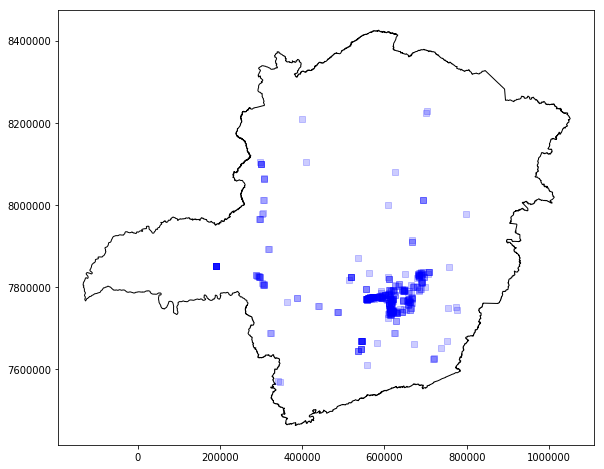

In [10]:
geo_dados = gpd.GeoDataFrame( pd.concat([geo_dados_lat, geo_dados_utm]))
geo_dados = geo_dados[geo_dados['geometry'].within(mg.iloc[0].geometry)]

base = mg.plot(color='w', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, alpha=0.2, figsize = (15,8), color = 'blue', markersize = 35, marker = 's')

In [12]:
geo_dados.plot(ax=base, alpha=0.2, figsize = (15,8), color = 'blue', markersize = 35, marker = 's').get_figure().savefig('mapa.svg', frameon = False, bbox_inches = 'tight', dpi = 300)

<Figure size 432x288 with 0 Axes>

## Região Metropolitana de Belo Horizonte

In [13]:
selecao = mg_meso['NM_MESO'] == 'METROPOLITANA DE BELO HORIZONTE'
mg_meso = mg_meso[selecao]

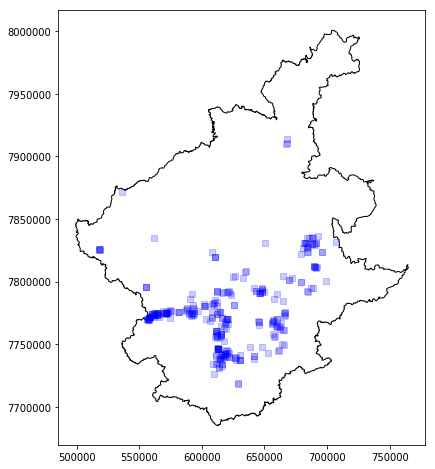

In [14]:
mg_meso = mg_meso.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
geo_dados = geo_dados[geo_dados['geometry'].within(mg_meso.iloc[0].geometry)]

base = mg_meso.plot(color='w', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, alpha=0.2, figsize = (15,8), color = 'blue', markersize = 35, marker = 's')

In [15]:
geo_dados.plot(ax=base, alpha=0.2, figsize = (15,8), color = 'blue', markersize = 35, marker = 's').get_figure().savefig('mapa2.svg', frameon = False, bbox_inches = 'tight', dpi = 300)

<Figure size 432x288 with 0 Axes>

In [16]:
geo_dados

,CNPJ DO EMPREENDEDOR,EMPREENDEDOR,CNPJ DO EMPREENDIMENTO,EMPREENDIMENTO,NOME,CLASSE,MUNICÍPIO,BACIA,TIPOLOGIA,SITUAÇÃO DE ESTABILIDADE,...,COORDENADA UTMY,LATITUDE GRAU,LATITUDE MINUTOS,LATITUDE SEGUNDOS,LONGITUDE GRAU,LONGITUDE MINUTOS,LONGITUDE SEGUNDOS,LATITUDE,LONGITUDE,geometry
39,33.592.510/0001-54,VALE S.A.,33.592.510/0447-98,VALE S.A.,BARRAGEM DE REJEITOS NORTE / LARANJEIRAS,III,Barão de Cocais,Rio Piracicaba,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,50.0,54.0,43.0,25.0,18.0,-19.848333,-43.421667,POINT (665275.6623609569 7804528.925719131)
42,17.469.701/0001-77,ARCELORMITTAL BRASIL S.A.,17.469.701/0086-66,ARCELORMITTAL BRASIL S.A.,BACIA 16,I,Bela Vista de Minas,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,47.0,9.0,43.0,10.0,22.0,-19.785833,-43.172778,POINT (691419.3489238258 7811184.63288244)
43,17.469.701/0001-77,ARCELORMITTAL BRASIL S.A.,17.469.701/0086-66,ARCELORMITTAL BRASIL S.A.,BACIA 17,I,Bela Vista de Minas,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,19.0,47.0,1.0,43.0,9.0,54.0,-19.783611,-43.165000,POINT (692237.0307820336 7811421.81563808)
64,03.405.415/0001-33,CIA. DE MINERAÇÃO SERRA AZUL - COMISA,03.405.415/0001-33,CIA. DE MINERAÇÃO SERRA AZUL - COMISA,DIQUE DE CAPTAÇÃO DE ÁGUA - DIQUE QUÉIAS,II,Brumadinho,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,20.0,7.0,38.0,44.0,18.0,58.0,-20.127222,-44.316111,POINT (571482.0079241548 7774293.376167905)
76,33.300.971/0001-06,EMPRESA DE MINERAÇÃO ESPERANÇA S.A.,33.300.971/0001-06,EMPRESA DE MINERAÇÃO ESPERANÇA S.A.,BARRAGEM DE GABIÕES,II,Brumadinho,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,NaN,20.0,6.0,56.0,44.0,13.0,5.0,-20.115556,-44.218056,POINT (581737.5727823086 7775539.40083424)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,33.592.510/0001-54,VALE S.A.,33.592.510/0447-98,VALE S.A.,DIQUE DA PILHA 3,II,São Gonçalo do Rio Abaixo,Rio Doce,Mineração,Estabilidade Garantida pelo Auditor,...,7802800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (672200 7802800)
593,17.157.264/0001-56,ICAL INDÚSTRIA DE CALCINAÇÃO LTDA.,17.157.264/0007-41,ICAL INDÚSTRIA DE CALCINAÇÃO LTDA.,BARRAGEM DE REJEITO DA UNIDADE NOVA GRANJA,I,São José da Lapa,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,7823708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (607891 7823708)
602,18.752.824/0001-83,ITAMINAS COMÉRCIO DE MINÉRIOS S.A.,18.752.824/0001-83,ITAMINAS COMÉRCIO DE MINÉRIOS S.A.,B4,III,Sarzedo,Rio Paraopeba,Mineração,Estabilidade Garantida pelo Auditor,...,7778211.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,POINT (594071 7778211)
687,17.157.264/0001-56,ICAL - INDÚSTRIA DE CALCINAÇÃO LTDA.,17.157.264/0001-56,ICAL - INDÚSTRIA DE CALCINAÇÃO LTDA.,BARRAGEM DESCOBERTO,III,Vespasiano,Rio São Francisco,Mineração,Estabilidade Garantida pelo Auditor,...,7819488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (610893 7819488)
